In [15]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 13 16:15:24 2021

@author: Marvin Nöller
"""

# Importieren der benötigten Pakete
import os
import pandas as pd
import statsmodels.api as sm
import scipy.stats
import matplotlib as plt
import seaborn as sns

In [ ]:
##############################################################################
############### Aufgabe 5.2 ##################################################
##############################################################################

# Einlesen der Daten
data = pd.read_excel("trmgpa.xlsx","Sheet1")


In [24]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   term      732 non-null    int64  
 1   sat       732 non-null    int64  
 2   tothrs    732 non-null    int64  
 3   cumgpa    732 non-null    float64
 4   season    732 non-null    int64  
 5   frstsem   732 non-null    int64  
 6   crsgpa    732 non-null    float64
 7   verbmath  732 non-null    float64
 8   trmgpa    732 non-null    float64
 9   hssize    732 non-null    int64  
 10  hsrank    732 non-null    int64  
 11  id        732 non-null    int64  
 12  spring    732 non-null    int64  
 13  female    732 non-null    int64  
 14  black     732 non-null    int64  
 15  white     732 non-null    int64  
 16  ctrmgpa   366 non-null    float64
 17  ctothrs   366 non-null    float64
 18  ccrsgpa   366 non-null    float64
 19  ccrspop   366 non-null    float64
 20  cseason   366 non-null    float6

C:\Users\bondr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term', ylabel='sat'>

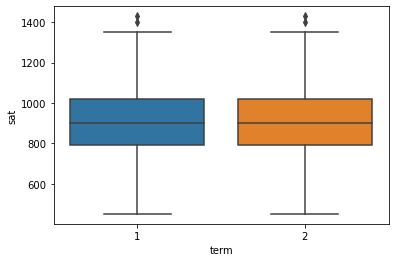

In [28]:
#data["term"].max()
sns.boxplot(data["term"],data["sat"])

## a

In [ ]:
# Erklärende Variable
x = data[['cumgpa']]
# Konstante hinzufügen
x = pd.DataFrame(sm.add_constant(x.values, has_constant='add'), \
                    columns = ['constant'] + x.columns.tolist())

# abhängige Variable
y = data[['trmgpa']]

# Schätzung des Modells
model_gpa = sm.OLS(y, x).fit()

# Ausgabe des fehlenden Parameters, gerundet auf 4 Nachkommastellen
print('Geschätzter Parameter: ', round(model_gpa.params['cumgpa'],4))

##############################################################################
# b)

# Wenn das Modell bereits geschätzt ist, lassen sich Tests in Python sehr
# leicht durchführen

# Wir testen ob der Koeffizient der Konstante unterschiedlich von 2 ist

# Erst führen wir den Test durch
t_test1 = model_gpa.t_test('constant = 2')
# Dann lassen wir uns den Wert der Teststatistik ausgeben
T_act = t_test1.tvalue.item() # .item() um kein array zu bekommen

# Als nächstes benötigen wir den kritischen Wert. Hierzu legen wir das
# Signifikanzniveau, sowie die Parameter n und k fest
sig_level = 0.01
n = model_gpa.nobs
k = model_gpa.df_model + model_gpa.k_constant
# Kritischer Wert
T_crit =scipy.stats.t.ppf((1-sig_level/2), n-k)

# Wir können uns die realisierte Teststatistik und den kritischen Wert
# anzeigen lassen und dann den Test händisch durchführen.
print('Realisierte Teststatistik, Aufgabenteil b): ', T_act)
print('Kritischer Wert,  Aufgabenteil b): ', T_crit)

# Wir können die Testentscheidung aber auch von Python fällen lassen
if abs(T_act) > T_crit :
    print('H0 von Aufgabenteil b) wird abgelehnt')
else:
    print('H0 von Aufgabenteil b) wird nicht abgelehnt')

# Alternativ können wir uns auch den p-Wert ausgeben lassen
p_value1 = t_test1.pvalue

# Auch hier können wir uns den p Wert anschauen und selbst mit dem Signifikanz
# Niveau vergleichen
print('p-Wert: ', p_value1)
# Oder wir lassen wieder Python die Entscheidung fällen
if p_value1 < sig_level :
    print('H0 von Aufgabenteil b) wird abgelehnt')
else:
    print('H0 von Aufgabenteil b) wird nicht abgelehnt')

##############################################################################
# c)

# Die Durchführung des Tests funktioniert analog zu Aufgabenteil b)
# Hier führen wir den Test nur mit Hilfe des p-Wertes durch

# Signifikanzniveau festlegen
sig_level_c = 0.1

# Test durchführen
t_test2 = model_gpa.t_test('cumgpa = 0.25')
# p-Wert ausgeben lassen
p_value2 = t_test2.pvalue
print('p-Wert, Aufgabenteil c): ', p_value2)
# Testentscheidung fällen
if p_value2 < sig_level_c :
    print('H0 von Aufgabenteil c) wird abgelehnt')
else:
    print('H0 Aufgabenteil c) wird nicht abgelehnt')
